In [1]:
from hw2 import generate_data
import numpy 

In [2]:
class1_paras = {'mx':1,'my':2, 'ux':0.1, 'uy':1, 'y':1, 'N':20}
class2_paras = {'mx':2,'my':4, 'ux':.1, 'uy':1, 'y':-1, 'N':50}
X, y = generate_data(class1_paras, class2_paras, seed=10)

In [3]:
min(y)

-1.0

In [4]:
import matplotlib.pyplot

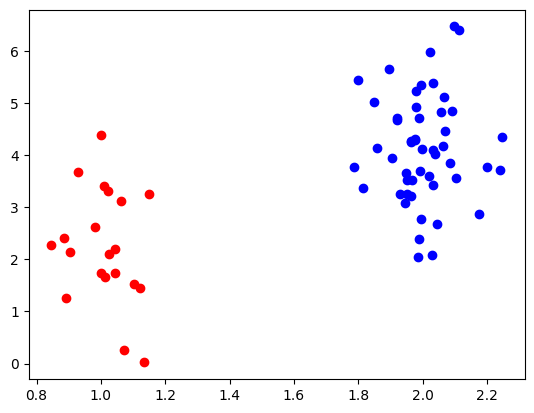

In [5]:
matplotlib.pyplot.plot(X[y==1,0], X[y==1,1], 'ro')
matplotlib.pyplot.plot(X[y==-1,0], X[y==-1,1], 'bo')

In [6]:
def compute_gradient(X, y, w):
    """
    Compute the gradient of the MSE loss function. 

    X: N x D numpy array, each row is a sample, not augmented
    y: 1-D numpy array, length N, labels for N samples 
    w: 1-D numpy array, length D+1, the last element of which is the bias term

    """
    N = X.shape[0]    
    X_augmented = numpy.hstack((X, numpy.ones((N,1)) )) # augment
    A = numpy.matmul(X_augmented, w) - y  # this results in a 1-D array, not a column vector
    gradient = X_augmented * A[:, numpy.newaxis]
    # https://stackoverflow.com/questions/5795700
    gradient = numpy.sum(gradient, axis=0)
     
    return gradient 

In [7]:
from hw2_solution import plot_data_hyperplane

In [20]:
# w = numpy.random.rand(3)
w = [0.1, 0.2, 0.3]
for _ in range(300):
    gradient = compute_gradient(X, y, w)
    w = w - 0.001 * gradient
    plot_data_hyperplane(X, y, w, f"learning_visual/learn_{str(_).zfill(3)}.png")